# 과일이미지를 비지도학습으로 분류해 보자

In [2]:
# k평균 
# 무작위로 k개의 클러스터를 중심으로 정한다
# 각 셈플에서 가장 가까운 클러스터의 중심을 찾아 해당 클러스터의 샘플을 저장
# 샘플의 평균갑시으로 클러스터의 중심을 변경
# 클러스터의 중심에 변화가 없을 때 까지 반복한다

In [3]:
! pip install wget
import wget
url= 'https://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruits =  np.load('fruits_300_data')
fruits.shape, type(fruits)

((300, 100, 100), numpy.ndarray)

In [7]:
fruits2 = fruits.reshape(-1,100*100)
fruits2.shape

(300, 10000)

In [10]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, random_state=42)
km.fit(fruits2)

KMeans(n_clusters=3, random_state=42)

In [14]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
np.unique( km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [17]:
import matplotlib.pyplot as plt

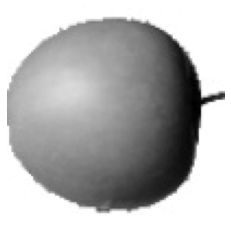

In [29]:
# fruits[ km.labels_ == 1][0]
plt.imshow(fruits[ km.labels_ == 0][0], cmap="gray_r")
plt.axis('off')
plt.show()

In [46]:
# fruits[ km.labels_ == 0]
# print(round(np.sqrt(98)))      
def showDetectLabelImage(fruitsLabel,size):        
    loopsize = round(np.sqrt(size))
    fig, axs =  plt.subplots(loopsize,loopsize, figsize=(10,10))
    count = 0
    for i in range(loopsize):
        for j in range(loopsize):        
            if(count < size):
                axs[i,j].imshow( fruits[ km.labels_ == fruitsLabel][i*loopsize+j], cmap='gray_r')
            axs[i,j].axis('off')
            count += 1
    plt.show()                

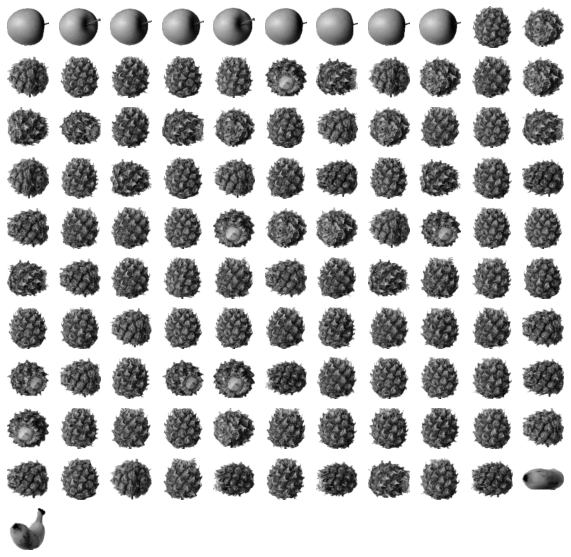

In [47]:
showDetectLabelImage(0,111)

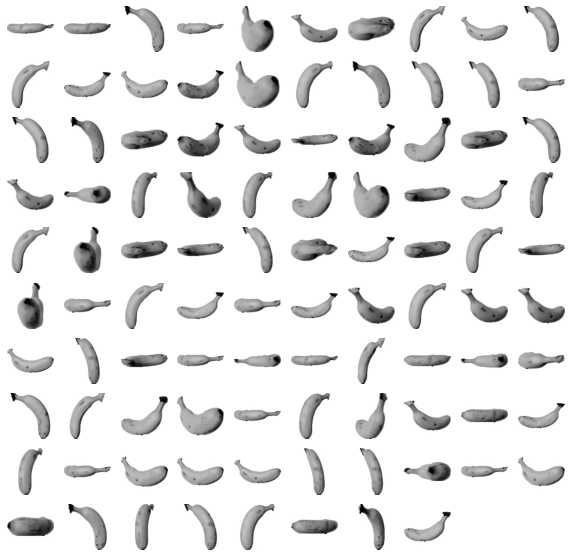

In [48]:
showDetectLabelImage(1,98)

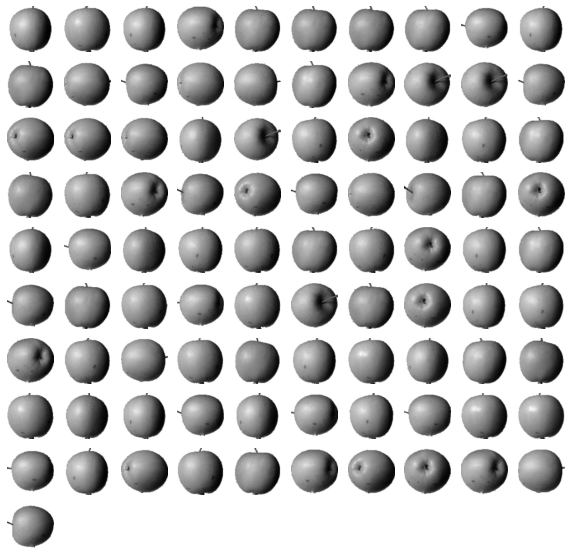

In [50]:
showDetectLabelImage(2,91)

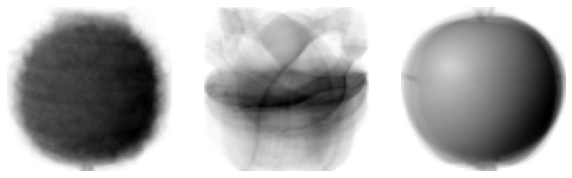

In [54]:
km.cluster_centers_
centerImage = km.cluster_centers_.reshape(-1,100,100)
len(centerImage)

fig, axs =  plt.subplots(1,3, figsize=(10,10))
for i in range(3):
    axs[i].imshow(centerImage[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()  


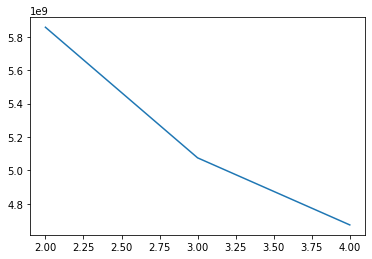

In [56]:
# km.inertia_  이니셔 : 클러스터의 중심과 클러스터에 속한 셈플사이의 거리의 제곱의 합
# 클러스터의 갯수가 늘어나면  이니셔도 감소한다.
# 엘보우... 클러스터를 늘려가면서 이니셔 값을 보면 어느순간 꺽이는게 팔 꺽이는 것처럼 보여서 ... 그 점 최적
result = []
for k in range(2,5):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits2)
    result.append(km.inertia_)
plt.plot(range(2,5),result)    
plt.show()